In [2]:
import pandas as pd

data = pd.read_csv('Fish.csv')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Lets rename the length columns

In [3]:
data.rename(columns={"Length1": "Vlength", "Length2": "Dlength", "Length3": "Clength"},inplace=True)
data.head()

,Species,Weight,Vlength,Dlength,Clength,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
data.shape

(159, 7)

In [5]:
for col in data.columns:
    print('Column {} has {} missing values'.format(col,data[col].isnull().sum()))

Column Species has 0 missing values
Column Weight has 0 missing values
Column Vlength has 0 missing values
Column Dlength has 0 missing values
Column Clength has 0 missing values
Column Height has 0 missing values
Column Width has 0 missing values


There are no missing values in any of the dataset columns. Lets check also the type of each column

In [6]:
for col in data.columns:
    print('Column {} type is {}'.format(col,data[col].dtype))

Column Species type is object
Column Weight type is float64
Column Vlength type is float64
Column Dlength type is float64
Column Clength type is float64
Column Height type is float64
Column Width type is float64


Number of available species and number of individuals in each one

In [7]:
data['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

Descriptive analysis of each one of the numerical features available

In [8]:
data.describe()

,Weight,Vlength,Dlength,Clength,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


As it is possible to see, on the above table, the min weight present in the dataset is 0 which is obviously a bit strange. lets plot weight by height and check what we have

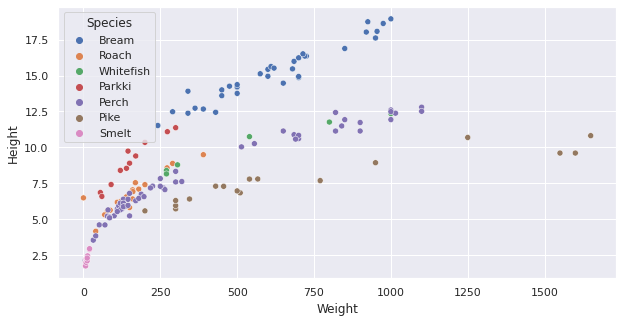

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

plt.figure(figsize=(10,5))
sns.scatterplot(x="Weight", y="Height", hue="Species" ,data=data)

Correlation of variables

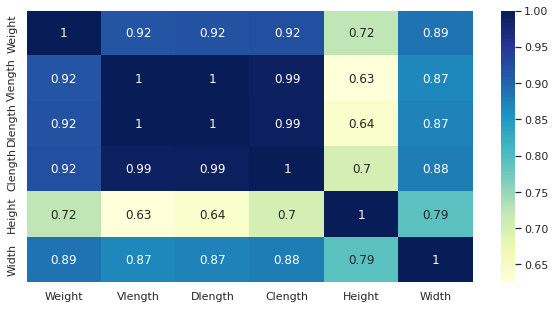

In [10]:
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

It seems that for the Roach species we clearly have an outlier with 0 in weight. For Smelt the majority of individuals has a weight close to zero (probably a small fish). Also in terms of correlation between diferent dimensions we can say that all the lenghts are extremely correlated and may be reduced in the final model. Lets investigate the outliers available in the dataset

In [12]:
data.columns[1:]

Index(['Weight', 'Vlength', 'Dlength', 'Clength', 'Height', 'Width'], dtype='object')

In [13]:
outliers_index=[]
for dim in data.columns[1:]:   # to exclude species column
    for species in ['Roach','Smelt','Pike']:
        print('Outliers for {} in {} dimension'.format(species,dim))
        col=data[data['Species']==species][dim]
        Q1 = col.quantile(0.25)
        Q3 = col.quantile(0.75)
        IQR = Q3 - Q1
        outliers = col[(col < Q1 - (1.5 * IQR)) | (col > Q3 + (1.5 * IQR))]
        for index,outlier in zip(outliers.index,outliers):
            outliers_index.append(index) if index not in outliers_index else None
            print(index,outlier) 
    print("")

Outliers for Roach in Weight dimension
40 0.0
52 290.0
54 390.0
Outliers for Smelt in Weight dimension
157 19.7
158 19.9
Outliers for Pike in Weight dimension

Outliers for Roach in Vlength dimension
35 12.9
54 29.5
Outliers for Smelt in Vlength dimension
158 13.8
Outliers for Pike in Vlength dimension

Outliers for Roach in Dlength dimension
35 14.1
54 31.7
Outliers for Smelt in Dlength dimension
157 14.3
158 15.0
Outliers for Pike in Dlength dimension

Outliers for Roach in Clength dimension
35 16.2
54 35.0
Outliers for Smelt in Clength dimension
158 16.2
Outliers for Pike in Clength dimension

Outliers for Roach in Height dimension
35 4.1472
52 8.8768
54 9.485
Outliers for Smelt in Height dimension
157 2.8728
158 2.9322
Outliers for Pike in Height dimension

Outliers for Roach in Width dimension
35 2.268
53 4.7736
54 5.355
Outliers for Smelt in Width dimension
157 2.0672
158 1.8792
Outliers for Pike in Width dimension



In [14]:
data.drop(outliers_index, inplace=True)
data.shape

(152, 7)

In [22]:
data = data.drop("Species", axis=1)
y = data.Weight
X = data.loc[:,data.columns != 'Weight']

In [23]:

X.head()

,Vlength,Dlength,Clength,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


Now divide the dataset in X_train and X_test and Y_train and Y_test

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77, shuffle=True)

In [35]:
X_test.columns

Index(['Vlength', 'Dlength', 'Clength', 'Height', 'Width'], dtype='object')

In [34]:
model.predict(X_test[:1])

array([344.81590355])

### Modelling

Now applying a linear regression model to the data

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression() # Tried to normalize the dataset but actually results do not improve that much 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

0.873339807236852


In [28]:
import pickle

filename = 'fishdata_model.pkl'
pickle.dump(model, open(filename, 'wb'))